## Assignment - EDA and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew


In [2]:
# Dataset

g= pd.read_csv("gplay.csv")

gplay = pd.read_csv("gplay.csv")


## Understand data :-

In [3]:
gplay.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [4]:
gplay.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+
10840,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone


In [5]:
gplay.drop(["Unnamed: 0"], axis=1,inplace = True)

In [6]:
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+


## Clean the data :-
## Missing Value

In [7]:
gplay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [8]:
gplay["Rating"].fillna(gplay["Rating"].mean(), inplace=True)

In [9]:
gplay["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [10]:
gplay["Type"].fillna("Free",inplace=True)

In [11]:
gplay["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [12]:
gplay["Content Rating"].fillna("Everyone",inplace=True)

In [13]:
gplay.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

## Identification of variables and data types

## Data Type Conversion as required

In [14]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [15]:
for data in gplay["Reviews"]:
    if not(str(data).isnumeric()):
        print(data)
        

3.0M


In [16]:
gplay[gplay["Reviews"] == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone


In [17]:
gplay.drop(10472,inplace=True)

In [18]:
gplay["Reviews"] = gplay["Reviews"].astype(int)

In [19]:
# Install column
def clean_installs(x):
    x = str(x)
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)

In [20]:
gplay["Installs"] = gplay["Installs"].map(clean_installs)

In [21]:
#gplay Price column
gplay["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
def clean_price(x):
    x = str(x)
    x = x.replace("$","")
    return float(x)

In [23]:
gplay["Price"] = gplay["Price"].map(clean_price)

In [24]:
# Size column
gplay["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [25]:
def clean_size(x):
    x = str(x)
    
    if x == "Varies with device":
        return np.nan
    elif x[-1] == "M":
        return float(x[:-1])
    else:
        x = float(x[:-1])
        return x/1000

In [26]:
gplay["Size"] = gplay["Size"].map(clean_size)

In [27]:
gplay["Size"].fillna(gplay["Size"].mean(), inplace=True)

In [28]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 804.5+ KB


## (Dtype - object) Visualization

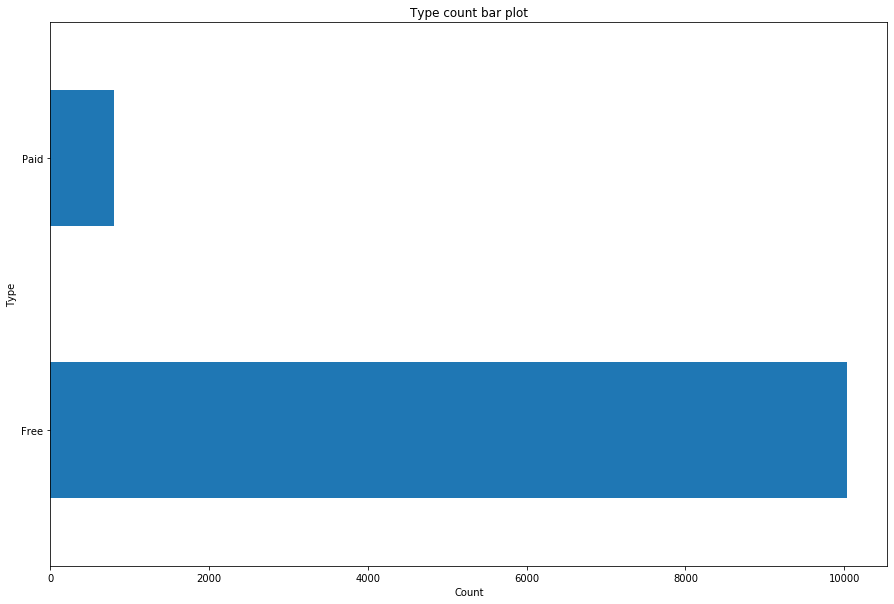

In [29]:
plt.figure(figsize=(15,10))
gplay["Type"].value_counts().plot(kind="barh")
plt.title("Type count bar plot")
plt.ylabel("Type")
plt.xlabel("Count")
plt.show()

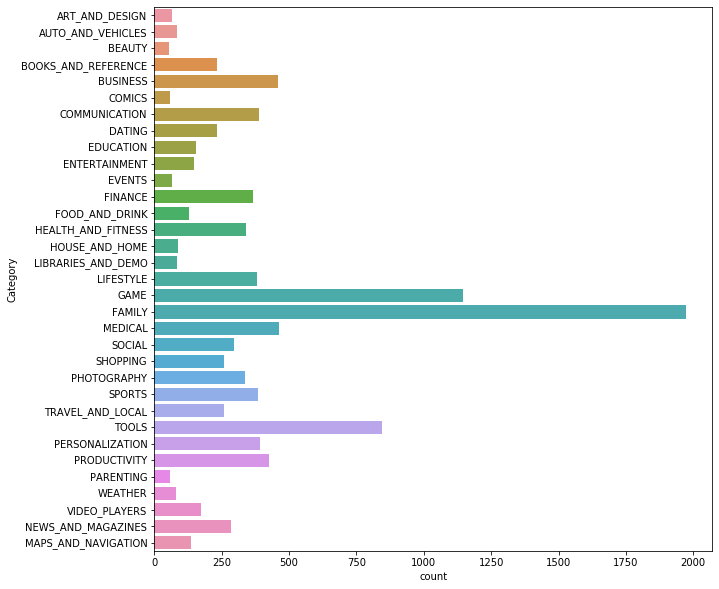

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data=gplay, y="Category")
plt.show()

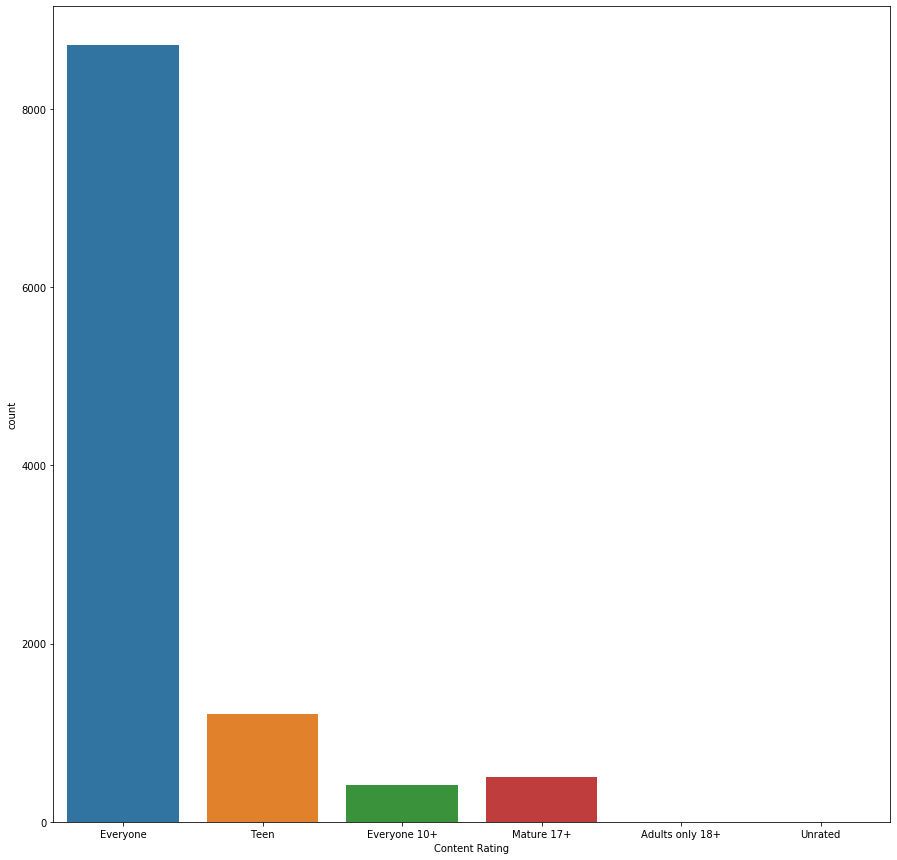

In [31]:
plt.figure(figsize = (15,15))
sns.countplot(gplay['Content Rating'])
plt.show()

## Outliers

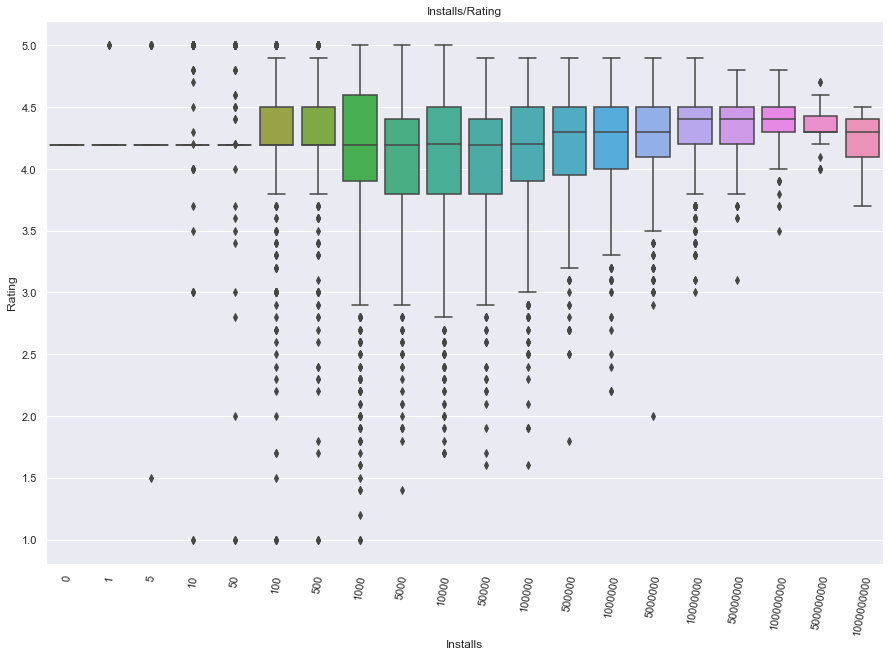

In [32]:
#boxplot plot installs/rates
plt.figure(figsize=(15,10))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=gplay)
plt.title("Installs/Rating")
plt.xticks(rotation=80)
plt.show()

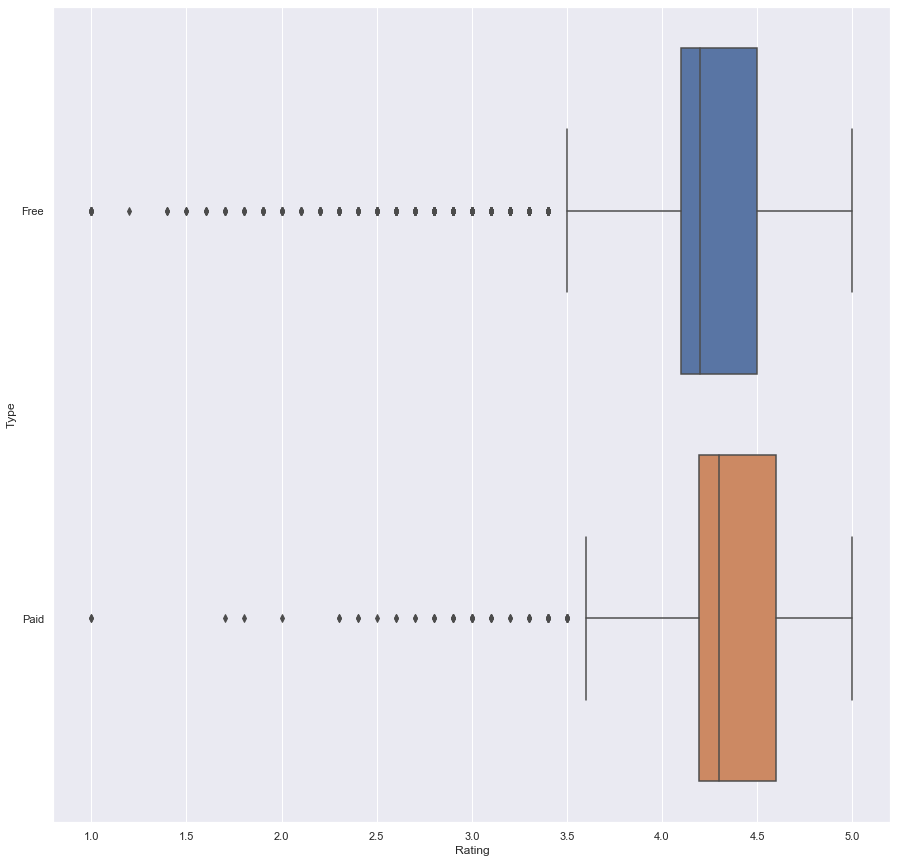

In [33]:
#boxplot plot Typs/rating
plt.figure(figsize = (15,15))
sns.boxplot(y='Type', x='Rating', data=gplay)
plt.show()

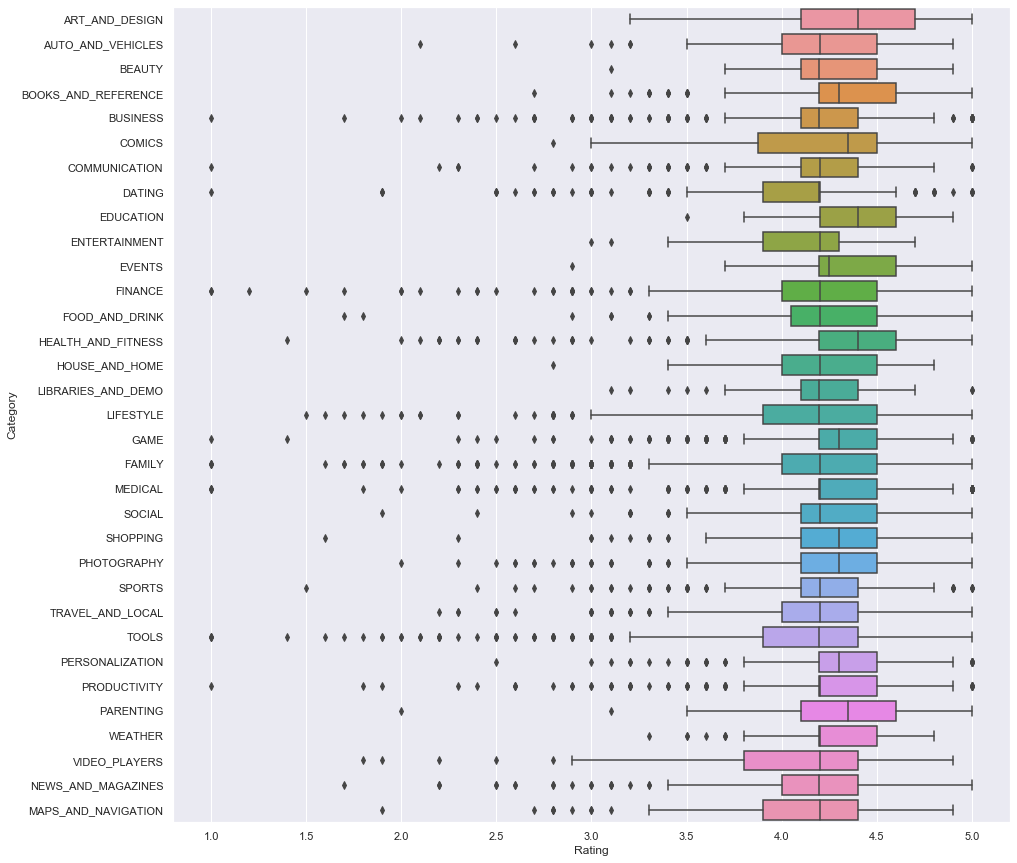

In [34]:
#boxplot plot Category/rating
plt.figure(figsize=(15,15))

sns.boxplot(data=gplay, y="Category",x ="Rating")

plt.show()

In [35]:
gplay[(gplay["Category"] == "EDUCATION") & (gplay["Rating"] < 3.8)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
841,EasyBib: Citation Generator,EDUCATION,3.5,1405,7.3,100000,Free,0.0,Everyone


In [36]:
gplay.drop(841,inplace=True)

In [37]:
gplay[(gplay["Category"] == "EVENTS") & (gplay["Rating"] < 3.5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
5987,Outdoor Movies BC,EVENTS,2.9,7,21.51653,500,Free,0.0,Everyone


In [38]:
gplay.drop(5987,inplace=True)

In [39]:
gplay[(gplay["Category"] == "ENTERTAINMENT") & (gplay["Rating"] < 3.4)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
862,Digital TV,ENTERTAINMENT,3.1,5241,21.51653,5000000,Free,0.0,Everyone
915,Acorn TV: World-class TV from Britain and Beyond,ENTERTAINMENT,3.0,493,23.00000,50000,Free,0.0,Everyone


In [40]:
gplay.drop([862,915],inplace=True)

##  Histogram , Skewness

## Correlation

In [41]:
gplay.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067891,0.074697,0.051051,-0.020250
Reviews,0.067891,1.000000,0.128251,0.643119,-0.009671
Size,0.074697,0.128251,1.000000,0.082218,-0.022997
Installs,0.051051,0.643119,0.082218,1.000000,-0.011694
Price,-0.020250,-0.009671,-0.022997,-0.011694,1.000000


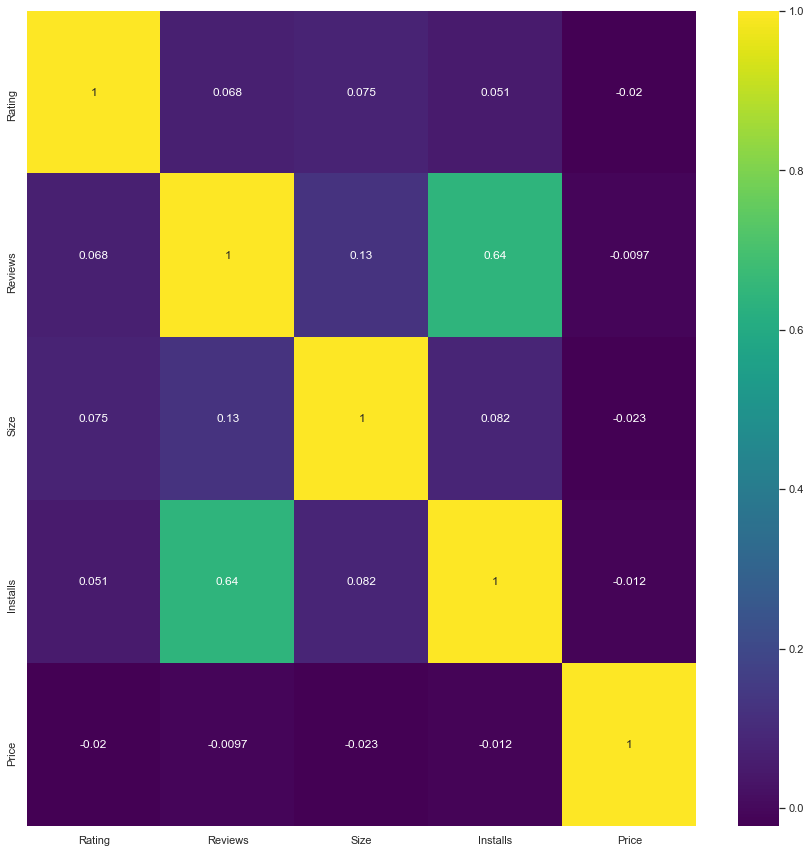

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(gplay.corr(),annot=True,cmap="viridis")
plt.show()

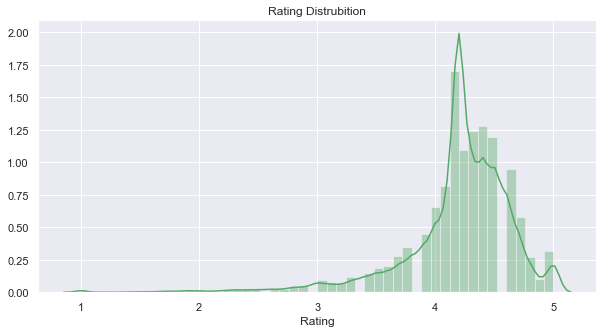

In [43]:
# distplot Rating
plt.figure(figsize=(10,5))
sns.distplot(gplay['Rating'],color='g');
plt.title("Rating Distrubition")
plt.show()

In [44]:
skew(gplay["Rating"])

-1.9941716003955778

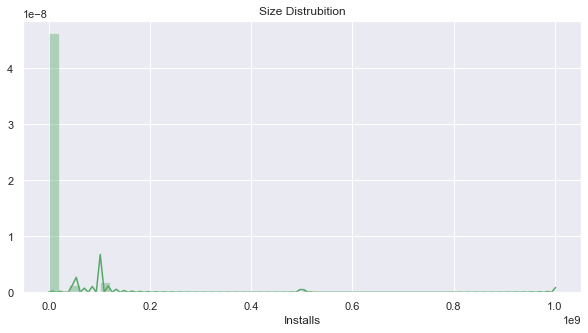

In [45]:
# distplot Installs
plt.figure(figsize=(10,5))
sns.distplot(gplay['Installs'],color='g');
plt.title("Size Distrubition")
plt.show()

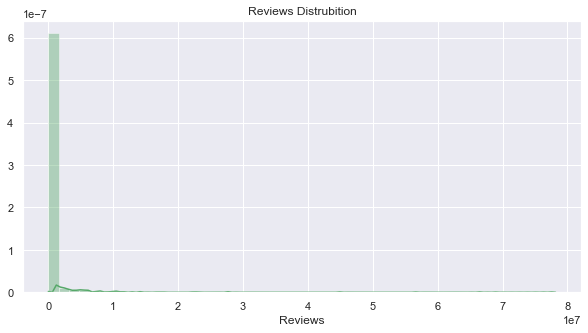

In [46]:
# distplot Reviews
plt.figure(figsize=(10,5))
sns.distplot(gplay['Reviews'],color='g');
plt.title("Reviews Distrubition")
plt.show()

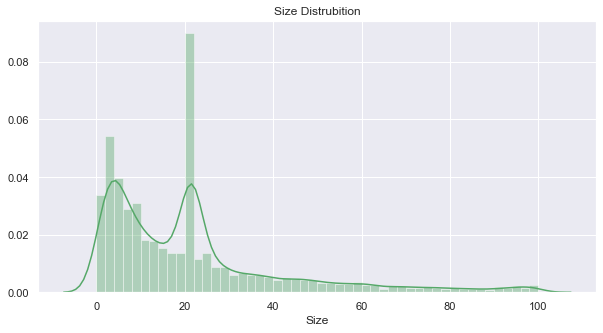

In [47]:
# distplot Size
plt.figure(figsize=(10,5))
sns.distplot(gplay['Size'],color='g');
plt.title("Size Distrubition")
plt.show()

## reduce skewness - sqrt, log

In [48]:
skew(gplay["Size"])

1.694954401251213

In [49]:
gplay["Size"] = np.sqrt(gplay["Size"])

In [50]:
skew(gplay["Size"])

0.606580926422754


## Make data appropriate for machine learning  :-



##  Handling categorical data

## Label encoding

In [51]:
le = LabelEncoder()

In [52]:
gplay["Type"] = gplay["Type"].map({'Free':0,"Paid":1})

In [53]:
gplay["Type"].unique()

array([0, 1], dtype=int64)

In [54]:
gplay["Type"] = le.fit_transform(gplay["Type"])

In [55]:
gplay["Content Rating"] = le.fit_transform(gplay["Content Rating"])

In [56]:
gplay["Content Rating"] = gplay["Content Rating"].astype("int64")

In [57]:
gplay["Category"] = le.fit_transform(gplay["Category"])

In [58]:
gplay["Category"] = gplay["Category"].astype("int64")

In [59]:
gplay_cat = gplay.select_dtypes(object)

In [60]:
gplay_cat

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
10836,Sya9a Maroc - FR
10837,Fr. Mike Schmitz Audio Teachings
10838,Parkinson Exercices FR
10839,The SCP Foundation DB fr nn5n


In [61]:
gplay_num = gplay.select_dtypes(["float64","int64"])

In [62]:
gplay_num.head()

,Category,Rating,Size,Installs,Type,Price,Content Rating
0,0,4.1,4.358899,10000,0,0.0,1
1,0,3.9,3.741657,500000,0,0.0,1
2,0,4.7,2.949576,5000000,0,0.0,1
3,0,4.5,5.000000,50000000,0,0.0,4
4,0,4.3,1.673320,100000,0,0.0,1


In [63]:
gplay_cat.head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


In [64]:
gplay_num.head()

,Category,Rating,Size,Installs,Type,Price,Content Rating
0,0,4.1,4.358899,10000,0,0.0,1
1,0,3.9,3.741657,500000,0,0.0,1
2,0,4.7,2.949576,5000000,0,0.0,1
3,0,4.5,5.000000,50000000,0,0.0,4
4,0,4.3,1.673320,100000,0,0.0,1


In [65]:
cars_new = pd.concat([gplay_cat,gplay_num],axis=1)
cars_new

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.100000,4.358899,10000,0,0.0,1
1,Coloring book moana,0,3.900000,3.741657,500000,0,0.0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.700000,2.949576,5000000,0,0.0,1
3,Sketch - Draw & Paint,0,4.500000,5.000000,50000000,0,0.0,4
4,Pixel Draw - Number Art Coloring Book,0,4.300000,1.673320,100000,0,0.0,1
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,11,4.500000,7.280110,5000,0,0.0,1
10837,Fr. Mike Schmitz Audio Teachings,11,5.000000,1.897367,100,0,0.0,1
10838,Parkinson Exercices FR,20,4.193338,3.082207,1000,0,0.0,1
10839,The SCP Foundation DB fr nn5n,3,4.500000,4.638591,1000,0,0.0,3
